<a href="https://www.kaggle.com/code/justinjoka/car-price-prediction-with-scikit-learn?scriptVersionId=163840676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Cleaning

#### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Loading the raw data

In [2]:
raw_data = pd.read_csv('/kaggle/input/car-features-and-prices-dataset/data.csv')
raw_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


### Determing the variable of interest

In [4]:
data = raw_data.drop(['Market Category','Model'],axis=1)
data.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,NaN,10,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,NaN,7172,NaN,NaN,8266,4787,NaN,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


### Dealing with missing values

In [5]:
data.isnull().sum()

Make                  0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11812,11812.000000,11812,11812.000000,11812.000000,11812,11812,11812.000000,11812,11812,11812.000000,11812.000000,11812.000000,1.181200e+04
unique,47,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,7155,NaN,NaN,8231,4732,NaN,4708,3013,NaN,NaN,NaN,NaN
mean,NaN,2010.361581,NaN,249.504487,5.649424,NaN,NaN,3.432526,NaN,NaN,26.320945,19.328141,1553.679902,4.055994e+04
std,NaN,7.594647,NaN,109.206947,1.751646,NaN,NaN,0.882919,NaN,NaN,7.443589,6.527734,1440.067820,6.028413e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099000e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.997000e+04
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.220500e+04


### Exploring PDFs

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


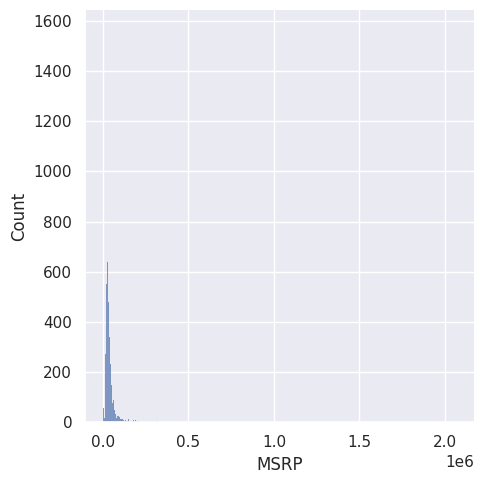

In [7]:
sns.displot(data_no_mv['MSRP'])

### Dealing with outliers

In [8]:
q = data_no_mv['MSRP'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['MSRP']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11693,11693.000000,11693,11693.000000,11693.000000,11693,11693,11693.000000,11693,11693,11693.000000,11693.000000,11693.000000,11693.000000
unique,45,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,7155,NaN,NaN,8161,4732,NaN,4684,2982,NaN,NaN,NaN,NaN
mean,NaN,2010.349867,NaN,246.096382,5.591807,NaN,NaN,3.441461,NaN,NaN,26.417087,19.416488,1561.167964,36552.149406
std,NaN,7.622035,NaN,103.785549,1.655155,NaN,NaN,0.878292,NaN,NaN,7.416042,6.499939,1442.580413,35605.267421
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,8.000000,2.000000,2000.000000
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,20890.000000
50%,NaN,2015.000000,NaN,225.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,29775.000000
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,41750.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


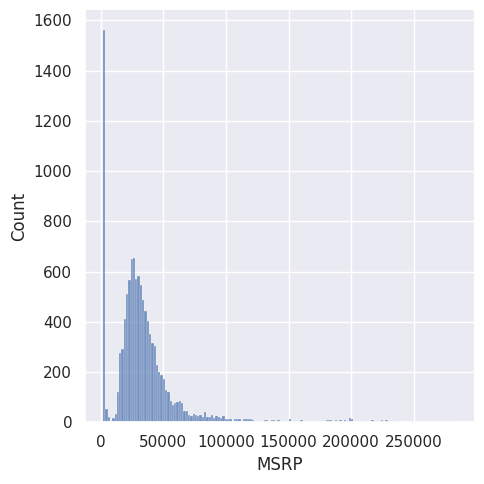

In [9]:
sns.displot(data_1['MSRP'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


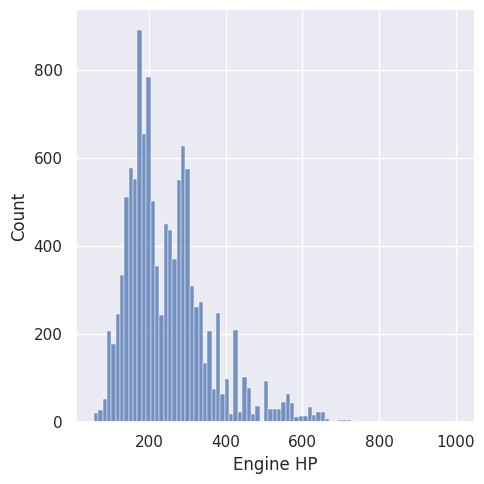

In [10]:
sns.displot(data_no_mv['Engine HP'])

In [11]:
q = data_no_mv['Engine HP'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Engine HP']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11691,11691.000000,11691,11691.000000,11691.000000,11691,11691,11691.000000,11691,11691,11691.000000,11691.000000,11691.000000,11691.000000
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1095,NaN,7155,NaN,NaN,8189,4732,NaN,4651,2999,NaN,NaN,NaN,NaN
mean,NaN,2010.324352,NaN,245.255154,5.598067,NaN,NaN,3.444444,NaN,NaN,26.397229,19.402874,1555.907279,37894.273715
std,NaN,7.619412,NaN,101.219474,1.674197,NaN,NaN,0.876783,NaN,NaN,7.437790,6.516246,1443.440638,42705.030300
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,8.000000,2.000000,2000.000000
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,20887.500000
50%,NaN,2015.000000,NaN,225.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,29775.000000
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,41725.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


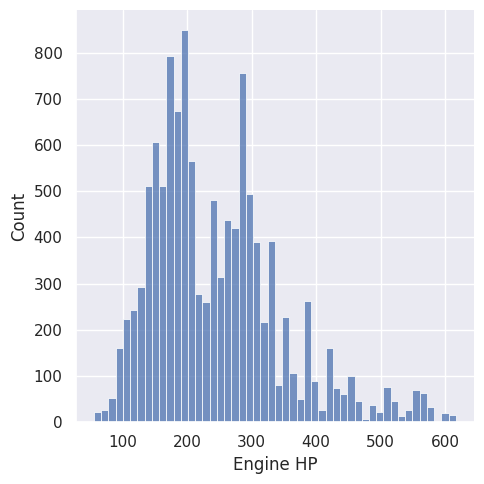

In [12]:
sns.displot(data_1['Engine HP'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


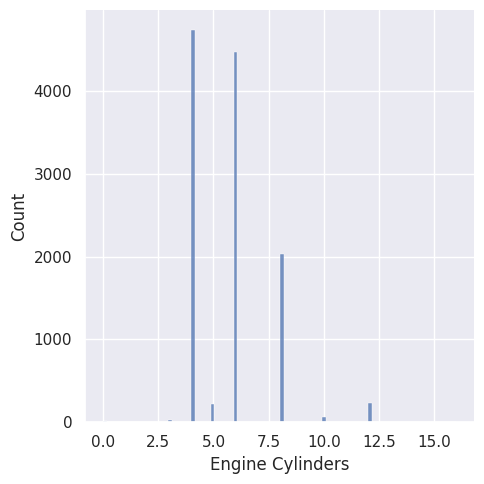

In [13]:
sns.displot(data_no_mv['Engine Cylinders'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


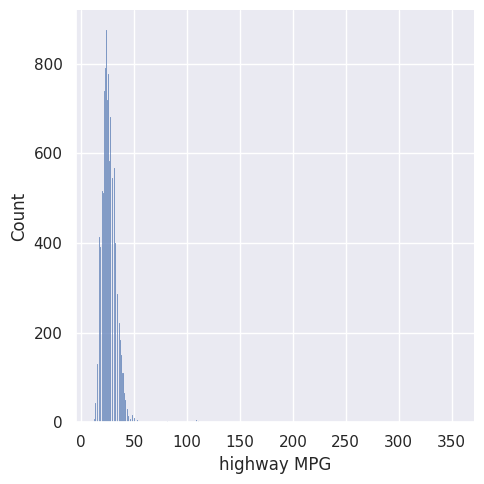

In [14]:
sns.displot(data_no_mv['highway MPG'])

In [15]:
q = data_no_mv['highway MPG'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['highway MPG']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11673,11673.000000,11673,11673.000000,11673.000000,11673,11673,11673.000000,11673,11673,11673.000000,11673.000000,11673.000000,1.167300e+04
unique,47,NaN,8,NaN,NaN,4,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1106,NaN,7067,NaN,NaN,8143,4600,NaN,4611,2961,NaN,NaN,NaN,NaN
mean,NaN,2010.310032,NaN,250.840487,5.674205,NaN,NaN,3.426112,NaN,NaN,25.999058,18.965647,1550.493703,4.072336e+04
std,NaN,7.616780,NaN,109.080170,1.742506,NaN,NaN,0.885809,NaN,NaN,5.995022,4.962671,1445.468121,6.061765e+04
min,NaN,1990.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,15.000000,549.000000,2.096000e+04
50%,NaN,2015.000000,NaN,230.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,25.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.240000e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


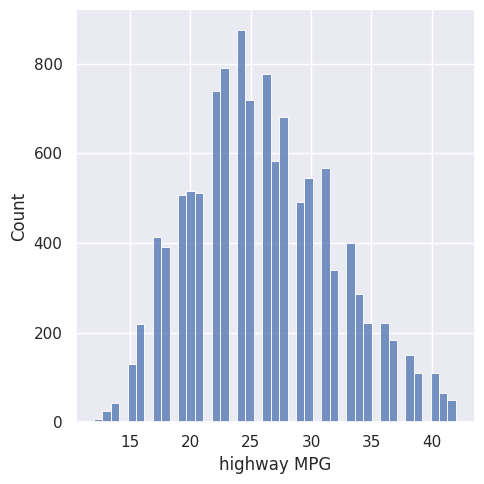

In [16]:
sns.displot(data_1['highway MPG'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


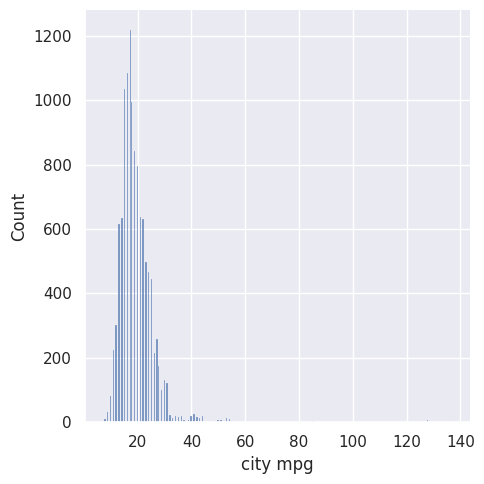

In [17]:
sns.displot(data_no_mv['city mpg'])

In [18]:
q = data_no_mv['city mpg'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['city mpg']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11680,11680.000000,11680,11680.000000,11680.000000,11680,11680,11680.000000,11680,11680,11680.000000,11680.000000,11680.000000,1.168000e+04
unique,47,NaN,8,NaN,NaN,4,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1107,NaN,7046,NaN,NaN,8124,4604,NaN,4628,2969,NaN,NaN,NaN,NaN
mean,NaN,2010.307791,NaN,250.698630,5.672517,NaN,NaN,3.426113,NaN,NaN,26.051627,18.942209,1545.220548,4.070442e+04
std,NaN,7.618822,NaN,109.168523,1.743319,NaN,NaN,0.885820,NaN,NaN,6.765328,4.853995,1438.088617,6.060518e+04
min,NaN,1990.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,15.000000,549.000000,2.092500e+04
50%,NaN,2015.000000,NaN,230.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,25.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.240000e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


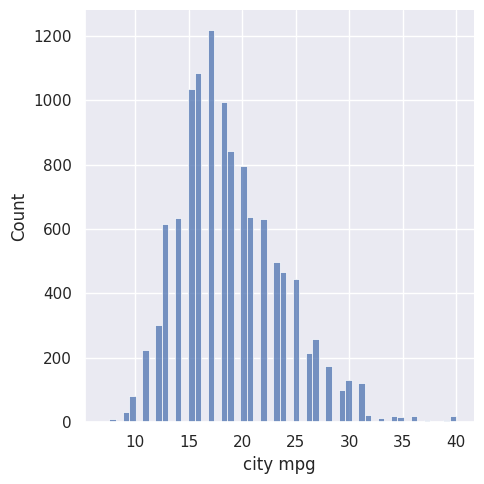

In [19]:
sns.displot(data_1['city mpg'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


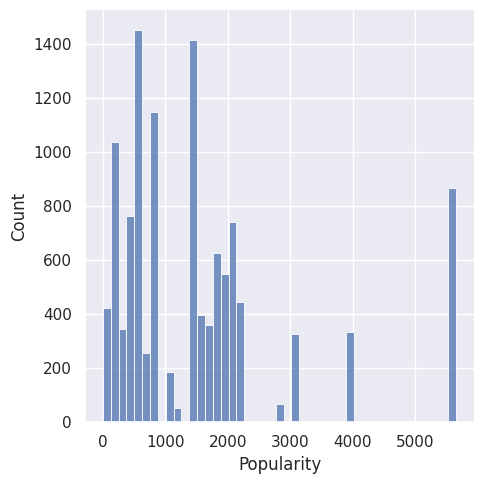

In [20]:
sns.displot(data_no_mv['Popularity'])

In [21]:
q = data_no_mv['Popularity'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Popularity']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,10944,10944.000000,10944,10944.000000,10944.000000,10944,10944,10944.000000,10944,10944,10944.000000,10944.000000,10944.000000,1.094400e+04
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,6593,NaN,NaN,7609,4466,NaN,4470,2905,NaN,NaN,NaN,NaN
mean,NaN,2010.412555,NaN,250.012610,5.626096,NaN,NaN,3.437135,NaN,NaN,26.525585,19.462445,1228.233827,4.160421e+04
std,NaN,7.554283,NaN,110.678246,1.772906,NaN,NaN,0.886337,NaN,NaN,7.513191,6.580292,892.654875,6.233989e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099500e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1013.000000,3.001750e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,1851.000000,4.287250e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


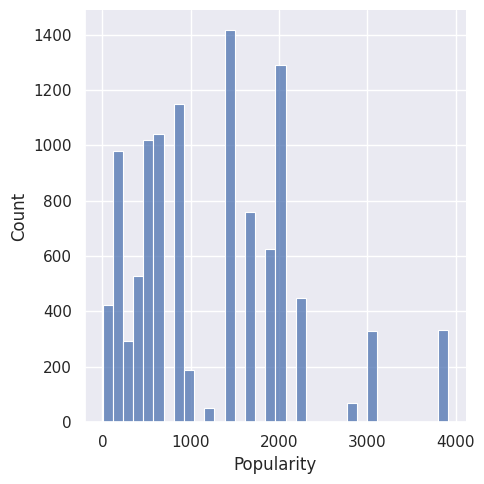

In [22]:
sns.displot(data_1['Popularity'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


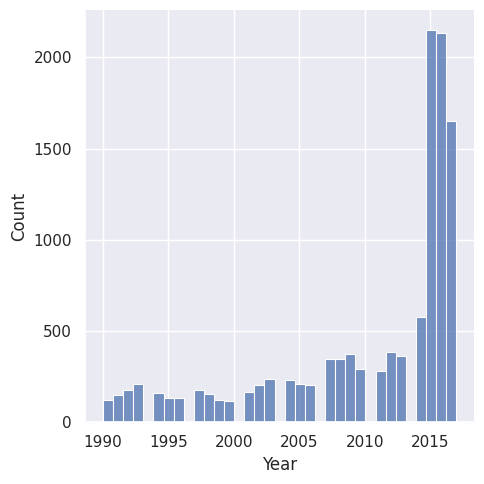

In [23]:
sns.displot(data_no_mv['Year'])

In [24]:
data_cleaned = data_1.reset_index(drop=True)

In [25]:
data_cleaned.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,10944,10944.000000,10944,10944.000000,10944.000000,10944,10944,10944.000000,10944,10944,10944.000000,10944.000000,10944.000000,1.094400e+04
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,6593,NaN,NaN,7609,4466,NaN,4470,2905,NaN,NaN,NaN,NaN
mean,NaN,2010.412555,NaN,250.012610,5.626096,NaN,NaN,3.437135,NaN,NaN,26.525585,19.462445,1228.233827,4.160421e+04
std,NaN,7.554283,NaN,110.678246,1.772906,NaN,NaN,0.886337,NaN,NaN,7.513191,6.580292,892.654875,6.233989e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099500e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1013.000000,3.001750e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,1851.000000,4.287250e+04


# OLS Assumptions

### Checking the OLS assumptions

### 1.Linearity

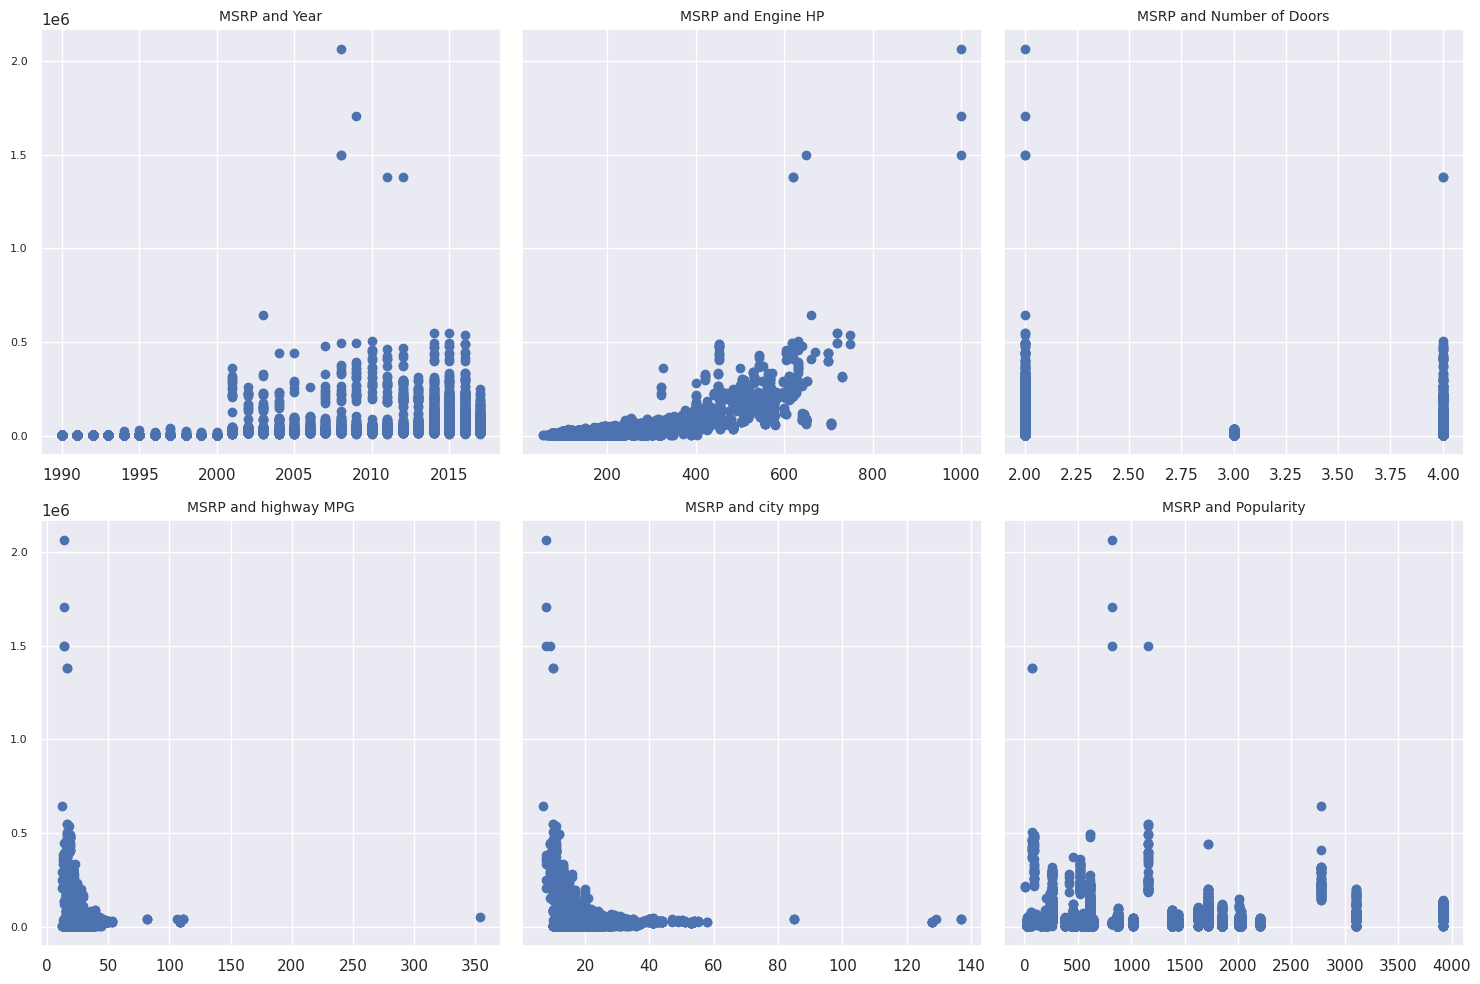

In [26]:
import matplotlib.pyplot as plt

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, figsize=(15, 10))

# Scatter plots
ax1.scatter(data_cleaned['Year'], data_cleaned['MSRP'])
ax2.scatter(data_cleaned['Engine HP'], data_cleaned['MSRP'])
ax3.scatter(data_cleaned['Number of Doors'], data_cleaned['MSRP'])
ax4.scatter(data_cleaned['highway MPG'], data_cleaned['MSRP'])
ax5.scatter(data_cleaned['city mpg'], data_cleaned['MSRP'])
ax6.scatter(data_cleaned['Popularity'], data_cleaned['MSRP'])

# Titles
ax1.set_title('MSRP and Year', fontsize=10)
ax2.set_title('MSRP and Engine HP', fontsize=10)
ax3.set_title('MSRP and Number of Doors', fontsize=10)
ax4.set_title('MSRP and highway MPG', fontsize=10)
ax5.set_title('MSRP and city mpg', fontsize=10)
ax6.set_title('MSRP and Popularity', fontsize=10)



# Adjusting y-axis tick labels font size
for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()


In [27]:
log_MSRP = np.log(data_cleaned['MSRP'])
data_cleaned['log_MSRP'] = log_MSRP
data_cleaned

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,log_MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,10.739327
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,10.612754
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,10.500949
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,10.290449
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,10.448715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,10.739002
10940,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,10.945000
10941,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,10.832102
10942,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,10.838011


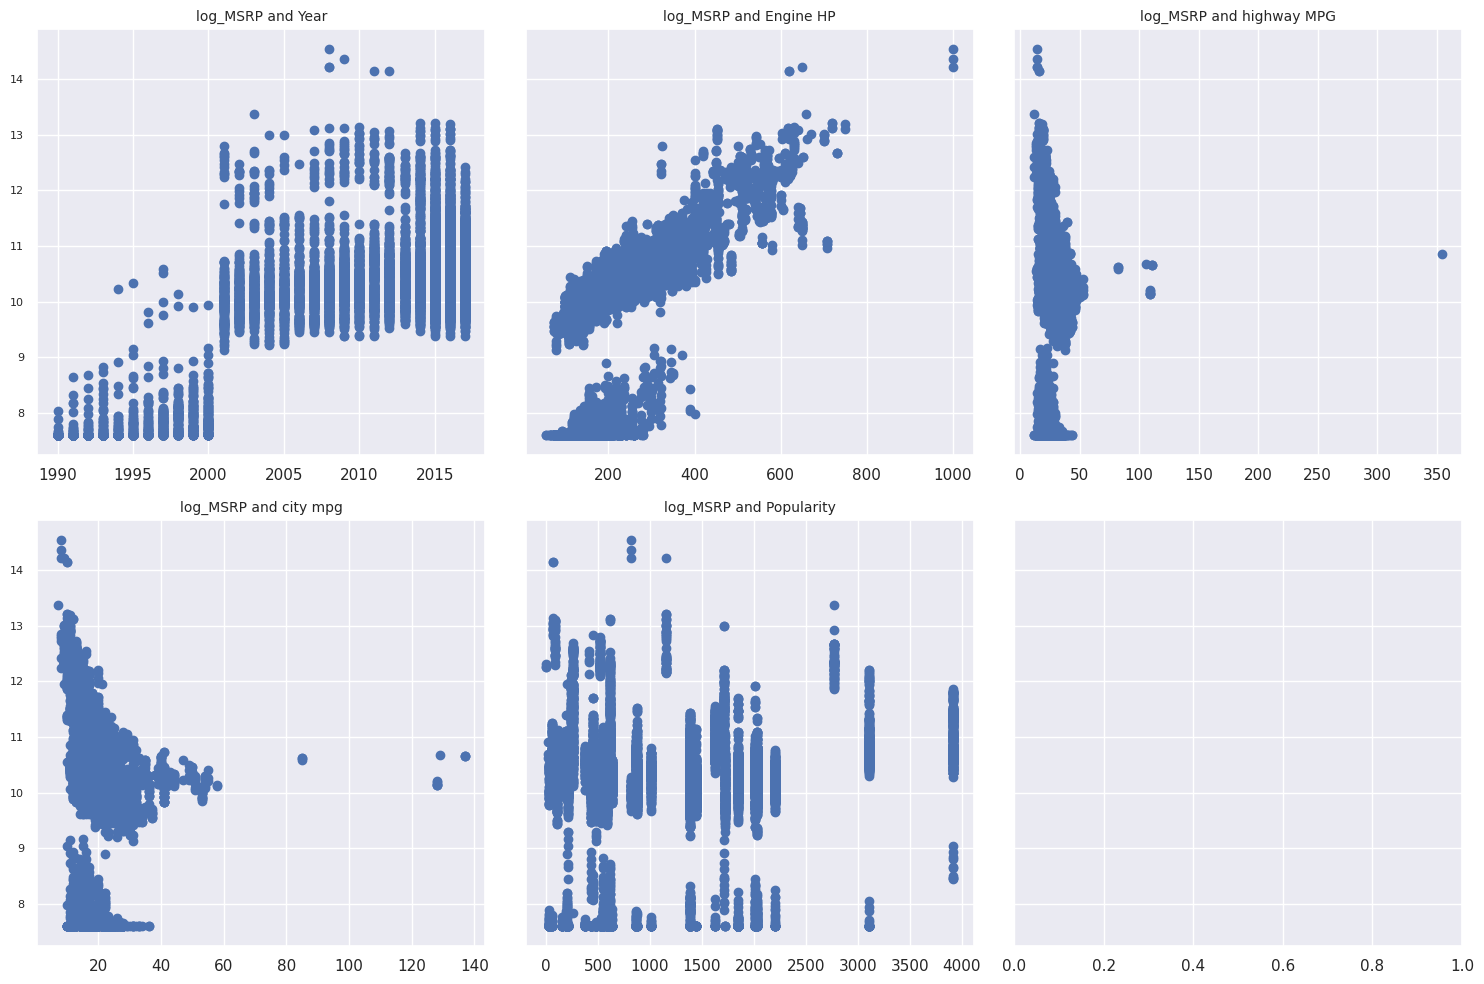

In [28]:
import matplotlib.pyplot as plt

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, figsize=(15, 10))

# Scatter plots
ax1.scatter(data_cleaned['Year'], data_cleaned['log_MSRP'])
ax2.scatter(data_cleaned['Engine HP'], data_cleaned['log_MSRP'])
ax3.scatter(data_cleaned['highway MPG'], data_cleaned['log_MSRP'])
ax4.scatter(data_cleaned['city mpg'], data_cleaned['log_MSRP'])
ax5.scatter(data_cleaned['Popularity'], data_cleaned['log_MSRP'])

# Titles
ax1.set_title('log_MSRP and Year', fontsize=10)
ax2.set_title('log_MSRP and Engine HP', fontsize=10)
ax3.set_title('log_MSRP and highway MPG', fontsize=10)
ax4.set_title('log_MSRP and city mpg', fontsize=10)
ax5.set_title('log_MSRP and Popularity', fontsize=10)



# Adjusting y-axis tick labels font size
for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()


In [29]:
data_cleaned = data_cleaned.drop(['MSRP'], axis=1)

### Multicollinearity

In [30]:
data_cleaned.columns.values

array(['Make', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'log_MSRP'], dtype=object)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Year','Engine HP','highway MPG','city mpg','Popularity']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [32]:
vif

,VIF,features
0,32.571567,Year
1,8.183274,Engine HP
2,46.940332,highway MPG
3,36.002935,city mpg
4,2.977661,Popularity


In [33]:
data_no_multicollinearity = data_cleaned.drop(['highway MPG', 'Year'],axis=1)

In [34]:
data_no_multicollinearity.columns.values

array(['Make', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Vehicle Size', 'Vehicle Style', 'city mpg', 'Popularity',
       'log_MSRP'], dtype=object)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Engine HP','city mpg','Popularity']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [36]:
vif

,VIF,features
0,3.243981,Engine HP
1,3.524941,city mpg
2,2.940308,Popularity


# Create Dummies

In [37]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [38]:
data_with_dummies.head()

,Engine HP,Engine Cylinders,Number of Doors,city mpg,Popularity,log_MSRP,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,335.0,6.0,2.0,19,3916,10.739327,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,300.0,6.0,2.0,19,3916,10.612754,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,300.0,6.0,2.0,20,3916,10.500949,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,230.0,6.0,2.0,18,3916,10.290449,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,230.0,6.0,2.0,18,3916,10.448715,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


### Rearrange a bit

In [39]:
data_with_dummies.columns.values

array(['Engine HP', 'Engine Cylinders', 'Number of Doors', 'city mpg',
       'Popularity', 'log_MSRP', 'Make_Alfa Romeo', 'Make_Aston Martin',
       'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Bugatti',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler',
       'Make_Dodge', 'Make_FIAT', 'Make_Ferrari', 'Make_GMC',
       'Make_Genesis', 'Make_HUMMER', 'Make_Honda', 'Make_Hyundai',
       'Make_Infiniti', 'Make_Kia', 'Make_Lamborghini', 'Make_Land Rover',
       'Make_Lexus', 'Make_Lincoln', 'Make_Lotus', 'Make_Maserati',
       'Make_Maybach', 'Make_Mazda', 'Make_McLaren', 'Make_Mercedes-Benz',
       'Make_Mitsubishi', 'Make_Nissan', 'Make_Oldsmobile',
       'Make_Plymouth', 'Make_Pontiac', 'Make_Porsche',
       'Make_Rolls-Royce', 'Make_Saab', 'Make_Scion', 'Make_Spyker',
       'Make_Subaru', 'Make_Suzuki', 'Make_Toyota', 'Make_Volkswagen',
       'Make_Volvo', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/

In [40]:
cols = ['log_MSRP','Engine HP', 'Engine Cylinders', 'Number of Doors', 'city mpg',
       'Popularity', 'Make_Alfa Romeo', 'Make_Aston Martin',
       'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Bugatti',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler',
       'Make_Dodge', 'Make_FIAT', 'Make_Ferrari', 'Make_GMC',
       'Make_Genesis', 'Make_HUMMER', 'Make_Honda', 'Make_Hyundai',
       'Make_Infiniti', 'Make_Kia', 'Make_Lamborghini', 'Make_Land Rover',
       'Make_Lexus', 'Make_Lincoln', 'Make_Lotus', 'Make_Maserati',
       'Make_Maybach', 'Make_Mazda', 'Make_McLaren', 'Make_Mercedes-Benz',
       'Make_Mitsubishi', 'Make_Nissan', 'Make_Oldsmobile',
       'Make_Plymouth', 'Make_Pontiac', 'Make_Porsche',
       'Make_Rolls-Royce', 'Make_Saab', 'Make_Scion', 'Make_Spyker',
       'Make_Subaru', 'Make_Suzuki', 'Make_Toyota', 'Make_Volkswagen',
       'Make_Volvo', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Large',
       'Vehicle Size_Midsize', 'Vehicle Style_2dr SUV',
       'Vehicle Style_4dr Hatchback', 'Vehicle Style_4dr SUV',
       'Vehicle Style_Cargo Minivan', 'Vehicle Style_Cargo Van',
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup',
       'Vehicle Style_Passenger Minivan', 'Vehicle Style_Passenger Van',
       'Vehicle Style_Regular Cab Pickup', 'Vehicle Style_Sedan',
       'Vehicle Style_Wagon']

In [41]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_MSRP,Engine HP,Engine Cylinders,Number of Doors,city mpg,Popularity,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,10.739327,335.0,6.0,2.0,19,3916,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,10.612754,300.0,6.0,2.0,19,3916,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,10.500949,300.0,6.0,2.0,20,3916,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,10.290449,230.0,6.0,2.0,18,3916,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,10.448715,230.0,6.0,2.0,18,3916,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


# Linear regression model

### Declare the inputs and targets

In [42]:
targets = data_preprocessed['log_MSRP']
inputs = data_preprocessed.drop(['log_MSRP'],axis=1)

### Scale the data

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [44]:
inputs_scaled = scaler.transform(inputs)

# Training and Testing

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=165)

### Create the regression

In [46]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [47]:
y_hat = reg.predict(x_train)

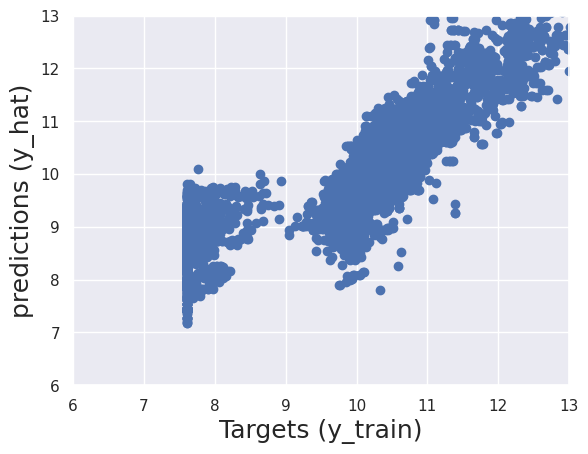

In [48]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF')

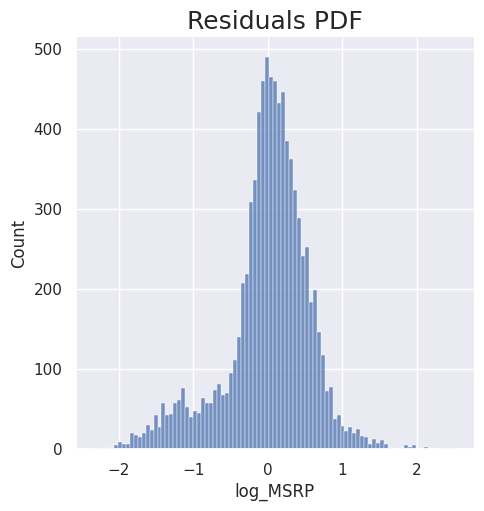

In [49]:
sns.displot(y_train -y_hat)
plt.title("Residuals PDF", size=18)

In [50]:
reg.score(x_train, y_train)

0.7347124669456879

### Finding the weight and bias

In [51]:
reg.intercept_

10.1320590144556

In [52]:
reg.coef_

array([ 8.11428103e-01, -2.06403722e-01,  5.06355418e-01,  2.87747785e-01,
       -6.15704031e+10, -1.34136626e+08,  3.48234039e+08,  3.41190774e+10,
        4.40424091e+10,  1.78628145e+09,  7.03399447e+08, -4.48249814e+08,
        1.83138750e+10,  2.46418990e+10,  7.23181126e+09,  2.63821814e+10,
        3.10632944e+09,  1.39301038e+10,  5.03936966e+09, -2.08964446e+08,
       -2.01019795e+08,  2.72780938e+10,  1.39769260e+10, -1.65141689e+08,
        1.48710787e+10,  4.52518185e+09,  4.22985944e+08,  2.32108177e+09,
       -1.16923277e+09,  1.45032840e+09,  1.70278279e+08, -3.61063074e+08,
        4.96236799e+09,  3.12494119e+08,  5.02623214e+09,  2.19538454e+09,
        2.71539363e+10, -1.42754239e+09,  1.96889245e+09,  5.34940731e+07,
        1.15461916e+10, -4.32580667e+08,  1.18876629e+09, -5.04239961e+08,
       -2.30660208e+08,  4.54555449e+09,  3.35252897e+09,  3.17019883e+10,
        1.20463033e+10,  7.26606481e+09, -1.33928135e-01, -2.05147266e-03,
       -3.14254761e-02, -

In [53]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Engine HP,8.114281e-01
1,Engine Cylinders,-2.064037e-01
2,Number of Doors,5.063554e-01
3,city mpg,2.877478e-01
4,Popularity,-6.157040e+10
...,...,...
77,Vehicle Style_Passenger Minivan,-1.169915e-01
78,Vehicle Style_Passenger Van,-2.304459e-02
79,Vehicle Style_Regular Cab Pickup,-5.794525e-03
80,Vehicle Style_Sedan,-4.491844e-01


In [54]:
data_cleaned['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Cadillac',
       'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini', 'Lincoln',
       'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura', 'Rolls-Royce',
       'Maserati', 'Lexus', 'Aston Martin', 'Land Rover', 'Lotus',
       'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Bugatti'], dtype=object)

### Testing

In [55]:
y_hat_test = reg.predict(x_test)

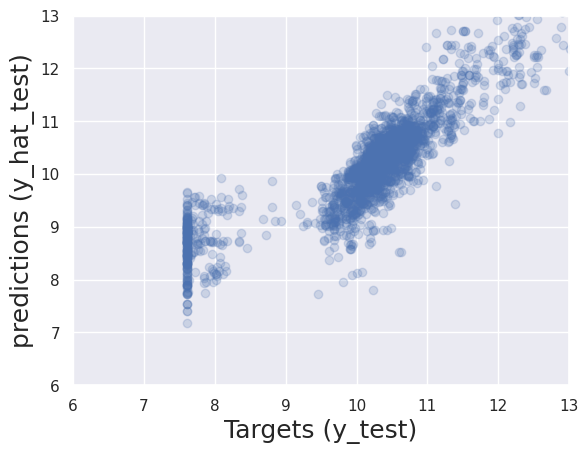

In [56]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

# Improving Model Performance

In [57]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['prediction'])
df_pf.head()

,prediction
0,29609.185713
1,55989.376807
2,50798.108155
3,38497.730296
4,29690.621554


In [58]:
df_pf['Target'] = np.exp(y_test)
df_pf

,prediction,Target
0,29609.185713,NaN
1,55989.376807,40650.0
2,50798.108155,NaN
3,38497.730296,NaN
4,29690.621554,NaN
...,...,...
2184,46782.775771,22260.0
2185,23457.365803,NaN
2186,28685.799337,NaN
2187,200703.101028,NaN


In [59]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.778852
1    10.405323
2    11.520894
3    10.447264
4    10.279352
Name: log_MSRP, dtype: float64

In [60]:
df_pf['Target'] = np.exp(y_test)
df_pf

,prediction,Target
0,29609.185713,47995.0
1,55989.376807,33035.0
2,50798.108155,100800.0
3,38497.730296,34450.0
4,29690.621554,29125.0
...,...,...
2184,46782.775771,51695.0
2185,23457.365803,29715.0
2186,28685.799337,21640.0
2187,200703.101028,153195.0


In [61]:
df_pf['Residual'] =df_pf['Target'] - df_pf['prediction']

In [62]:
df_pf['Differences%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,prediction,Target,Residual,Differences%
0,29609.185713,47995.0,18385.814287,38.307770
1,55989.376807,33035.0,-22954.376807,69.485021
2,50798.108155,100800.0,50001.891845,49.605051
3,38497.730296,34450.0,-4047.730296,11.749580
4,29690.621554,29125.0,-565.621554,1.942048
...,...,...,...,...
2184,46782.775771,51695.0,4912.224229,9.502320
2185,23457.365803,29715.0,6257.634197,21.058840
2186,28685.799337,21640.0,-7045.799337,32.559147
2187,200703.101028,153195.0,-47508.101028,31.011522


In [63]:
df_pf.describe()

,prediction,Target,Residual,Differences%
count,2.189000e+03,2.189000e+03,2189.000000,2189.000000
mean,4.245774e+04,4.078650e+04,-1671.234648,54.055739
std,7.680045e+04,5.574621e+04,38984.274803,80.873183
min,1.312892e+03,2.000000e+03,-711226.770598,0.061677
25%,1.413097e+04,2.082000e+04,-5338.136034,13.589638
50%,2.603198e+04,3.002000e+04,1244.812481,28.958987
75%,4.349990e+04,4.285000e+04,8912.657076,50.331019
max,2.093977e+06,1.382750e+06,284452.442070,683.373935


In [64]:
df_pf.sort_values(by=['Differences%'])

,prediction,Target,Residual,Differences%
367,29976.500045,29995.0,18.499955,0.061677
1282,23942.661009,24005.0,62.338991,0.259692
2120,64267.111825,64450.0,182.888175,0.283768
1357,25914.803721,25840.0,-74.803721,0.289488
1610,21904.908331,21840.0,-64.908331,0.297199
...,...,...,...,...
226,14247.815827,2239.0,-12008.815827,536.347290
1104,14250.099304,2212.0,-12038.099304,544.217871
270,13617.991566,2000.0,-11617.991566,580.899578
157,15405.327626,2000.0,-13405.327626,670.266381
